In [2]:
import numpy as np
import matplotlib.pyplot as plt

### General Setting
If we use $t\in\{-1, 1\}$ instead of $\{0,1\}$, i.e. the model is 
$$z=\vec w^T\vec x + b, y = sign(z)$$

### Hinge Loss
$$\mathcal L_H(z,t) =\max\{0,1-zt\}$$

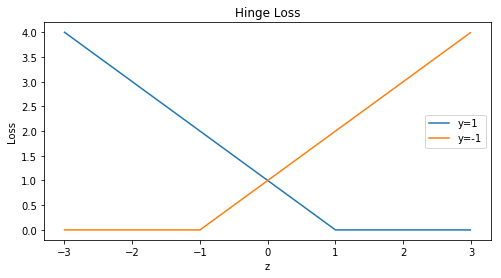

In [3]:
z = np.arange(-3, 3, 0.01)
plt.figure(figsize=(8, 4))
plt.plot(z, np.maximum(0, 1 - z), label="y=1")
plt.plot(z, np.maximum(0, 1 + z), label="y=-1")
plt.title("Hinge Loss")
plt.xlabel("z")
plt.ylabel("Loss")
plt.legend();

If we use a linear classifier and write $z^{(i)}(w,b)=\vec w^T\vec x + b$, then we want to minimize the training loss 
$$\min_{\vec w, b} \sum_{i=1}^NL_H(z^{(i)}, t^{(i)}) = \min_{\vec w, b} \sum_{i=1}^N \max\{0, 1 - t^(i)z^{(i)}(\vec w, b)\}$$
This formulation is called __support vector machines__.

Generally used with $L_2$ regularization
$$\min_{\vec w, b} \sum_{i=1}^N \max\{0, 1 - t^(i)z^{(i)}(\vec w, b)\} + \frac{\lambda\|\vec w\|_2^2}{2}$$

### Optimal Separating Hyperplane

Suppose we want to find a linear classifier that separates a set of data points. In $\mathbb R^2$, this will looks like a line $y=wx+b$; in $\mathbb R^{D>2}$, that will be a hyperplane. 

Note that there are multiple separating hyperplanes, i.e. different $w,b$'s

A hyperplane that separates two classes and maximizes the distance to the closest point from either class, i.e. maximize the margin of the classifier. 

### Boosting
Train classifiers sequentially, each time focusing on training data points that were previously misclassified.

#### Key Idea
learn a classifier using different costs (by applying different weights). Intuitively, "tries harder" on examples with higher cost. 

Let misclassification rate be and change cost function
$$\frac{1}{N}\sum_{n=1}^N \mathbb I[h(x^{(n)})\neq t^{(n)}] \Rightarrow \frac{1}{N}\sum_{n=1}^N w^{(n)}\mathbb I[h(x^{(n)})\neq t^{(n)}]$$

$w^{(n)}$ is normalized so that the overall weights does not change the overall loss. 
$$\forall n. w^{(n)} > 0, \sum_{n=1}^N w^(n)=1$$

#### Weak Learner / Classifier
Weak learner is a learning algorithm that outputs a hypothesis that performs slightly better than chance i.e. error rate $>0.5$

We want such classifiers for they are __computationally efficient__. 

For example, __Decision Stump__: A decision tree with a single split. 

One single weak classifier is not capable of making the training error small. so that 
$$err = \sum_{n=1}^N w^{(n)}\mathbb I[h(x^{(n)})\neq t^{(n)}] \leq \frac{1}{2} -\gamma, \gamma > 0 \text{ is small}$$
Then, we want to combine many weak classifiers to get a better ensemble of classifiers. 

### Adaptive Boosting (AdaBoost)

#### Key steps
- At each iteration, re-weight the training samples by assigning larger weights to samples that were classified incorrectly. 
- We train a new weak classifier based on the re-weighted samples
- We add this weak classifier to the ensemble of weak classifiers. This ensemble is the new classifier
- Repeat the process

#### Boosting vs. Bootstrap
__Boosting__ reduces bias by making each classifier focus on previous mistakes.  
__Bootstrap__ reduces variance, while keeping bias the same 

#### Algorithm  
data $D_N = \{x^{(n)}, t^{(n)}\}_{n=1}^N, t^{(n)}\in\{-1,1\}$  
A classifier or _hypothesis_ $h: \vec x \rightarrow \{-1, 1\}$  
0 - 1 loss: $\mathbb I(h(x^{(n)}\neq t^{(n)})) = \frac{(1-h(x^{(n)})t^{(n)})}{2}$  
WeakLearn$:D_N\times \vec w\rightarrow h$ be a function that returns a classifier


AdaBoost($D_N$, WeakLearn):  
 - init $w^{(n)} = N^{-1}, \forall n$  
 - For $t = 1, ..., T$  
   - $h_t\leftarrow \text{WeakLearn}(D_N, \vec w)$
   - compute weighted error $err_t = \frac{\sum_1^N w^{(n)\mathbb I(h_t(x^{(n)})\neq t^{(n)})}}{\sum_{n=1}^Nw^{(n)}}$
   - compute classifier coefficient $\alpha_t = \frac{1}{2}\log(\frac{1-err_t}{err_t}), a_t \in (0, \infty)$
   - update data weights $w^{(n)}\leftarrow w^{(n)}\exp(-\alpha_tt^{(n)}h_t(\vec x^{(n)}))$
   
- return $H(x) = sign(\sum_{t=1}^T \alpha_t h_t(\vec x))$

#### Intuition
Weak classifiers which get lower weighted error get more weight in the final classifier.  
Consider the shape of $\alpha_t$
 - If $err\approx 0, a_t$ high so misclassified examples get more attention
 - If $err\approx 0.5, a_t$ low so misclassified examples are not emphasized 

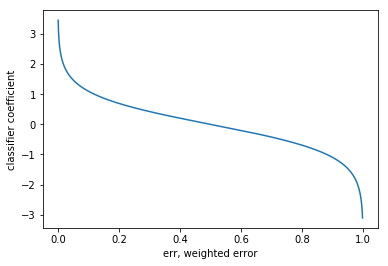

In [7]:
err = np.arange(0.001, 0.999, 0.001)
a = np.log((1 - err) / err) / 2
plt.plot(err, a)
plt.xlabel("err, weighted error")
plt.ylabel("classifier coefficient");

### Geometric converge
Assume that at each iteration of AdaBoost the WeakLearn returns a hypothesis with error $err\leq \frac{1}{2} - \gamma$ for all $t = 1, ..., T$ with $\gamma > 0$. The training error of the output hypothesis 
$H(\vec x) = sign(\sum^T a_th_x(\vec x))$ is at most 
$$L_N(H) = \frac{1}{N} \sum^N \mathbb I\{H(\vec x^{(i)}\neq t^{(i)})\}\leq \exp(-2\gamma^2T)$$
__under the assumption__ that weak learner is $\gamma$-better than a random predictor. 

### Additive Model
With a more complex $H$ by adding more weak classifiers, we expect more complex classifiers overfit. However, this is not often true, sometimes the test error decreases even after the training error is zero.

#### General Setting
Consider a hypothesis class $\mathcal H$ with each $h_i\in\mathcal H:\vec x\rightarrow \{-1,1\}$ being "weak learners", or __bases__. 

Define an __additive model__ with $m$ terms to be 
$$H_m(x) = \sum_{i=1}^m \alpha_ih_i(\vec x)$$
where $(\alpha_1, ..., \alpha_m) \in \mathbb R^m$ and generally $a_i\in\mathbb R^+, \sum a_i = 1$. So that $H_m$ is a linear combination of bases classifiers, like in boosting. 

#### Stage-wise Training
Consider a greedy approach to fitting additive models, known as __stagewise training__

- init $H_0(x)= 0$
- For $m=1,..., T$
  - compute the $m$-th hypothesis $H_m = H_{m-1} + a_mh_m$ so that the loss is minimized, i.e.
  $$h_m,\alpha_m \rightarrow arg\min_{h\in\mathcal H, \alpha\in\mathbb R}\sum_{i=1}^N \mathcal L(H_{m-1}(x^{(i)}) + \alpha h(x^{(i)}, t^{(i)}))$$
  - $H_m = H_{m-1} + \alpha_mh_m$

Then consider the exponential loss, as a smooth simulation to Hinge loss. 

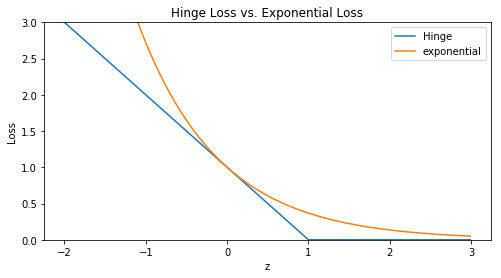

In [18]:
z = np.arange(-2, 3, 0.01)
plt.figure(figsize=(8, 4))
plt.plot(z, np.maximum(0, 1-z), label="Hinge")
plt.plot(z, np.exp(-z), label="exponential")
plt.title("Hinge Loss vs. Exponential Loss")
plt.xlabel("z")
plt.ylabel("Loss")
plt.ylim(0, 3)
plt.legend();

$$\begin{align*}
(h_m,a_m)\leftarrow arg\min &\sum_{i=1}^N \exp(-\bigg[H_{m-1}(x^{(i)} + ah(x^{(i)}))\bigg]t^{(i)})\\
= &\sum_{i=1}^N \exp(-H_{m-1}(x^{(i)}t^{(i)}))\exp(-ah(x^{(i)}t^{(i)}))\\
= &\sum_{i=1}^N w_i^{(m)}\exp(-ah(x^{(i)}t^{(i)}))
\end{align*}$$
where $w_i^{(m)}:= \exp(-H_{m-1}(x^{(i)})t^{(i)})$

Then, notice that $h(x)\in \{-1, 1\}$ is the classifier so that

$$h(x^{(i)}) = t^{(i)}, \exp(-ah(x^{(i)})t^{(i)}) = \exp(-a)$$
$$h(x^{(i)}) \neq t^{(i)}, \exp(-ah(x^{(i)})t^{(i)}) = \exp(a)$$
Then, our additive model is equivalent to 
\begin{align*}
\sum_{i=1}^N w_i^{(m)} \exp(-ah(x^{(i)})t^{(i)}) &= e^{-a} \sum^N w_i^{(m)}\mathbb I\{h(x^{(i)})=t^{(i)}\} \\
&+e^a \sum_{i=1}^N w_i^{(m)}\mathbb I(h(x^{(i)})\neq t^{(i)})\\
&= \text{correct predictions + incorrect predictions}
\end{align*}

Thne, define $I_{t}=\mathbb I(h(x^{(i)}) = t^{(i)}), I_{f}=\mathbb I(h(x^{(i)}) \neq t^{(i)})$, and consider of summation above, we can further group them by 
\begin{align*}
&e^{-a}\sum^N w_i^{(m)} I_t + e^a\sum^N w_i^{(m)}I_f - e^{-a}\sum^N w_i^{(m)}I_f + e^{-a}\sum^N w_i^{(m)}I_f\\
&= (e^a - e^{-a})\sum_{i=1}^N w_i^{(m)}I_f + e^{-a}\sum_{i=1}^N w_i^{(m)}(I_f+I_t)\\
&= (e^a - e^{-a})\sum_{i=1}^N w_i^{(m)}I_f + e^{-a}\sum_{i=1}^N w_i^{(m)}
\end{align*}

To optimize $h$, is equivalent to minimize 
$$ (e^a - e^{-a})\sum_{i=1}^N w_i^{(m)}\mathbb I(h(x^{(i)})\neq t^{(i)})$$

To optimize $\alpha$, define weighted classification error: 
$$err_m = \frac{\sum^N w_i^{(m)}\mathbb I(h_m(x^{(i)})\neq t^{(i)})}{\sum w_i^{(m)}}$$
and with of minimization on $h$ 
\begin{align*}
&\min_a\min_{h\in\mathcal H} \sum_{i=1}^N w_i^{(m)}\exp(-ah(x^{(i)})t^{(i)})\\\
=&\min_a\bigg\{(e^a-e^{-a})\sum^N w_i^{(m)}I_f + e^{-a}\sum^N w_i^{(m)}\bigg\}\\
\mathcal L=&\min_a\bigg\{(e^a-e^{-a})err_m\sum^N w_i^{(m)} + e^{-a}\sum^N w_i^{(m)}\bigg\}
\end{align*}
Then consider the derivative, where $W = \sum^N w_i^{(m)}$, 
$$\frac{d\mathcal L}{da} = (e^a + e^{-a})err_m W - e^{-a} W$$
Set to 0
$$\begin{align*}
(e^a + e^{-a})err_m &= e^{-a}\\
(e^{2a} + 1)err_m &= 1\\
e^{2a} &= \frac{1-err_m}{err_m}\\
a &= \frac{1}{2}\log(\frac{1-err_m}{err_m})
\end{align*}$$

And for each iteration, 
$$\begin{align*}
w_i^{(m+1)} &= \exp(-H_m(x^{(i)})t^{(i)})\\
&= \exp(-\big[H_{m-1}(x^{(i)} + a_m h_m(x^{(i)}))\big]t^{(i)})\\
&= \exp(-H_{m-1}(x^{(i)})t^{(i)})\exp(-a_mh_m(x^{(i)}t^{(i)}))\\
&= w_i^{(m)}\exp(-a_mh_m(x^{(i)}t^{(i)}))
\end{align*}$$